<a href="https://colab.research.google.com/github/khareyash05/Parkinson-Disease-Classifier-using-Deep-Learning/blob/main/Efficentnetb7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import tensorflow_hub as hub
import tensorflow as tf
import PIL.Image as Image
import cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [100]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        width_shift_range=0.3,
                                        height_shift_range=0.3)
x_train = train_datagen.flow_from_directory(
        '/content/spiral/training',
        target_size = (224,224),
        # color_mode="grayscale",
        batch_size=4,
        class_mode='binary'
        )

Found 77 images belonging to 2 classes.


In [101]:
test_datagen = ImageDataGenerator(rescale=1./255)
x_test = test_datagen.flow_from_directory(
        '/content/spiral/testing',
        target_size=(224,224),
        batch_size=4,
        # color_mode="grayscale",
        class_mode='binary')

Found 30 images belonging to 2 classes.


In [102]:
feature_extractor_model = "https://tfhub.dev/google/efficientnet/b7/feature-vector/1"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224,224,3), trainable=False)

In [103]:
classes = 1

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(classes)
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_10 (KerasLayer)  (None, 2560)             64097680  
                                                                 
 dense_9 (Dense)             (None, 1)                 2561      
                                                                 
Total params: 64,100,241
Trainable params: 2,561
Non-trainable params: 64,097,680
_________________________________________________________________


In [104]:
parkinson_labels_dict = {
    'healthy': 0,
    'parkinson': 1
}
parkinson_labels = [0,1]

In [105]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),  
  metrics=['acc'])

history = model.fit(x_train,epochs=30)

Epoch 1/30
20/20 [==============================] - 50s 2s/step - loss: 0.7288 - acc: 0.4675
Epoch 2/30
20/20 [==============================] - 34s 2s/step - loss: 0.6029 - acc: 0.7273
Epoch 3/30
20/20 [==============================] - 33s 2s/step - loss: 0.5402 - acc: 0.7403
Epoch 4/30
20/20 [==============================] - 34s 2s/step - loss: 0.5111 - acc: 0.7532
Epoch 5/30
20/20 [==============================] - 33s 2s/step - loss: 0.4948 - acc: 0.7792
Epoch 6/30
20/20 [==============================] - 33s 2s/step - loss: 0.4685 - acc: 0.7792
Epoch 7/30
20/20 [==============================] - 33s 2s/step - loss: 0.4473 - acc: 0.8052
Epoch 8/30
20/20 [==============================] - 33s 2s/step - loss: 0.4824 - acc: 0.7273
Epoch 9/30
20/20 [==============================] - 33s 2s/step - loss: 0.4153 - acc: 0.8182
Epoch 10/30
20/20 [==============================] - 33s 2s/step - loss: 0.3925 - acc: 0.7792
Epoch 11/30
20/20 [==============================] - 33s 2s/step - lo

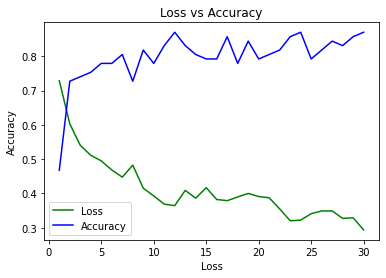

In [106]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['acc']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Loss')
plt.plot(epochs, loss_val, 'b', label='Accuracy')
plt.title('Loss vs Accuracy')
plt.xlabel('Loss')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [107]:
model.evaluate(x_train)

20/20 [==============================] - 36s 2s/step - loss: 0.2963 - acc: 0.8831


[0.29633328318595886, 0.8831169009208679]